<a href="https://colab.research.google.com/github/CandidoJr209/Autoencoders/blob/main/MNIST_Autoencoder_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

For this example we'll use the MNIST dataset. We'll load the dataset than normalize and finally turn the images into a single vector so we can feed the neural network easier

In [ ]:
(x_train, _),(x_test, _) = mnist.load_data()

In [ ]:
# Get image size
size_image = np.prod(x_train.shape[1:])

# Normalize data
x_train = x_train/255
x_test = x_test/255

# Reshape data
x_train = x_train.reshape(len(x_train), size_image)
x_test = x_test.reshape(len(x_test), size_image)

print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

x_train shape = (60000, 784)
x_test shape = (10000, 784)


Now that we have the dataset ready let's build our model

In [ ]:
encoding_dim = 64 # Define the dimentions of the compressed vector
input_img = Input(shape=(784,)) # Define input shape
encoded = Dense(encoding_dim, activation='relu')(input_img)  # Compress
decoded = Dense(784,activation='sigmoid')(encoded)  #  Decompress

autoencoder = Model(input_img, decoded)  # Define autoencoder model
encoder = Model(input_img, encoded) # Define encoder model

encoded_input = Input(shape=(encoding_dim,)) # Define input layer of decoder
decoder_layer = autoencoder.layers[-1]  # Define decoder output
decoder = Model(encoded_input, decoder_layer(encoded_input))  # Define decoder model

In [ ]:
autoencoder.summary()

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_17 (Dense)             (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test,x_test))

Once the model is trained we can test it's performance on the testing set

In [ ]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)

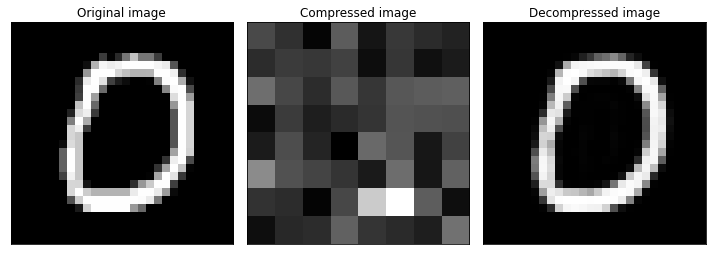

In [ ]:
i = 10 # Choose image index from x_test
plt.figure(figsize=(10,6))

# Display image from test set of endex i

ax = plt.subplot(1,3,1)
plt.imshow(x_test[i].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Original image')

# Display image from compressed test set of endex i

ax = plt.subplot(1,3,2)
plt.imshow(encoded_img[i].reshape(8,8))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Compressed image')

# Display image from decompressed test set of endex i

ax = plt.subplot(1,3,3)
plt.imshow(decoded_img[i].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Decompressed image')
plt.tight_layout()